## A.I. Assignment 4

## Learning Goals

By the end of this lab, you should be able to:
* Get familiar with tensors in pytorch
* Get familiar with the activation functions for ANN 
* Create a simple perceptron model with pytorch



## Common activation functions for ANN:

##### Sigmoid:

The sigmoid function is a popular choice for activation functions in neural networks. It has an $S-shaped$ curve:
$$f(x) = \frac{1}{1+e^{-x}}.$$

It has a number of appealing qualities:

1. *Nonlinearity*: Because the sigmoid function is nonlinear, it enables the neural network to simulate nonlinear interactions between inputs and outputs. A neural network would simply be a linear model without a nonlinear activation function like sigmoid, which would significantly restrict its capacity to describe complex relationships.

1. *Smoothness*: As the sigmoid function is differentiable and smooth, its derivative exist at every point. This is significant because it makes it possible for neural network training techniques based on gradients (such as backpropagation) to perform well.

1. *Boundedness*: The sigmoid function is bounded between 0 and 1, it means  its outputs can be interpreted as probabilities.  It is most useful in applications like binary classification, where the goal is to predict whether an input belongs to one of two classes.

1. *Monotonicity*: The sigmoid function is monotonic, which means that its outputs are always increasing or always decreasing with respect to its inputs. This makes it easy to interpret the effect of changes in input variables on the output of the network.

##### ReLU (Rectified Linear Unit):

The ReLU function is defined as $$f(x) = max(0, x).$$

It is a widely used activation function in deep learning due to its simplicity and effectiveness.

##### Tanh (Hyperbolic Tangent):

The $\tanh$ function is similar to the sigmoid function but produces outputs in the interval $[-1, 1]$:  
$$f(x) = \frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}.$$

##### Softmax:

The softmax function is commonly used in the output layer of a neural network for multi-class classification problems. It normalizes the output into a probability distribution over the classes.

Given a vector $\vec{z}$ of $n$ real numbers, the softmax function calculates a vector $\vec{s}$ of $n$ real numbers with the components:
$$s_j = \frac{e^{z_j}}{\sum_{k=1}^{n} {e^{z_k}}}.$$


##### Leaky ReLU:

The Leaky ReLU is a variation of the ReLU function that introduces a small non-zero gradient for negative inputs. It is defined as 
$$f(x) = max(0.01 \cdot x, x).$$

##### ELU (Exponential Linear Unit):

The ELU function is another variation of the ReLU function that introduces a small negative saturation value for negative inputs. It is defined as 

$$ f(x) = \biggl\{ \begin{matrix} x, & for & x > 0 \\
                      \alpha \cdot (e^{x} - 1), & for & x \leq 0 \end{matrix}$$
where $\alpha$ is a hyperparameter.

##### Swish:

The Swish function is a recent activation function that is a smooth approximation of the ReLU function. It is defined as f(x) = x * sigmoid(x).

In [1]:
import torch
torch.cuda.is_available()

False

create a tensor with requires_grad=True to tell PyTorch to track gradients for this tensor:

In [2]:
x = torch.tensor([2.0], requires_grad=True)
print(x)

tensor([2.], requires_grad=True)


You can perform any operations on this tensor as usual:

In [3]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To compute the gradients of y with respect to x, you need to call backward() on y:

In [6]:
y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [7]:
x.grad

tensor([6.])

In [8]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


Exercise 1.

Compute the gradient for the sigmoid activation function in 2 points using pytorch and check it with the known explicit formula 

In [9]:
x1 = torch.tensor([0.], requires_grad=True)
x2 = torch.tensor([100.], requires_grad=True)

y1 = 1 / (1 + torch.exp(-1 * x1))
y2 = 1 / (1 + torch.exp(-1 * x2))

#compute the gradients of tensors y1, y2    
y1.backward()
y2.backward() 
print("Gradient at x = 0 is {:.6f}".format(x1.grad.item()))
print("Gradient at x = 0 is {:.6f}".format((y1 * (1 - y1)).item())) #formula result
print("Gradient at x = 100 is {:.4f}".format(x2.grad.item()))
print("Gradient at x = 100 is {:.3f}".format((y1 * (1- y2)).item())) #formula result

Gradient at x = 0 is 0.250000
Gradient at x = 0 is 0.250000
Gradient at x = 100 is 0.0000
Gradient at x = 100 is 0.000


Exercise 2.

Compute the gradient for the linear activation function in 2 points using pytorch and check it with the known explicit formula

In [10]:
x1 = torch.tensor([0.], requires_grad=True)
x2 = torch.tensor([100.], requires_grad=True)

y1 = x1
y2 = x2

#compute the gradients of tensors y1, y2    
y1.backward()
y2.backward() 
print("Gradient at x = 0 is {:.6f}".format(x1.grad.item()))
print("Gradient at x = 0 is {:.6f}".format(1)) #formula result
print("Gradient at x = 100 is {:.4f}".format(x2.grad.item()))
print("Gradient at x = 100 is {:.3f}".format(1)) #formula result

Gradient at x = 0 is 1.000000
Gradient at x = 0 is 1.000000
Gradient at x = 100 is 1.0000
Gradient at x = 100 is 1.000


Execise 3.

Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.

In [11]:
x1 = torch.tensor([0.], requires_grad=True)
x2 = torch.tensor([100.], requires_grad=True)

#y1 = max(0, x1)
#y2 = max(0, x2)
#we can't compute like this because we are working with tensors

y1 = torch.max(torch.tensor(0.0), x1)
y2 = torch.max(torch.tensor(0.0), x2)

#compute the gradients of tensors y1, y2    
y1.backward()
y2.backward() 

#we have multiple cases at the computation of the explicit formula since the maximum can take either a const. or x as value
print("Gradient at x = 0 is {:.6f}".format(x1.grad.item()))
if(x1 <= 0):
    print("Gradient at x = 0 is {:.6f}".format(0)) #formula result 1
else:
    print("Gradient at x = 0 is {:.6f}".format(1)) #formula result 2
print("Gradient at x = 100 is {:.4f}".format(x2.grad.item()))

if(x2 <= 0):
    print("Gradient at x = 100 ix {:.4f}".format(0)) #formula result 1
else:
    print("Gradient at x = 100 ix {:.4f}".format(1)) #formula result 2

Gradient at x = 0 is 0.500000
Gradient at x = 0 is 0.000000
Gradient at x = 100 is 1.0000
Gradient at x = 100 ix 1.0000


Exercise 4. 

Write in python a function to plot the sigmoid activation function and its gradient using matplotlib

In [ ]:
import matplotlib.pyplot as mpl
import numpy as np

x = np.arange(-10, 10, 0.1) #the x axis
y = 1 / (1 + np.exp(-1 * x))
gradient = y * (1 - y) #this is the derivative of the sigmoid function

mpl.plot(x, y, color='b', label='Sigmoid activation function')
mpl.plot(x, gradient, color='g', label='Sigmoid gradient')
mpl.legend()
mpl.show()

Exercise 5. 

Write in python a function to plot the ReLU activation function and its gradient using matplotlib.

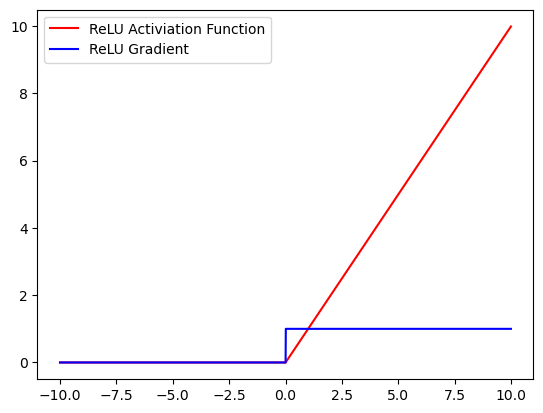

In [22]:
import matplotlib.pyplot as mpl
import numpy as np

x = np.arange(-10, 10, 0.1) #the x axis
y = np.maximum(0, x)

gradient = np.where(x <= 0, 0, 1) #derivative of the ReLU activation function

mpl.plot(x, y, color='r', label='ReLU Activiation Function')
mpl.plot(x, gradient, color='b', label='ReLU Gradient')
mpl.legend()
mpl.show()

Exercise 6. 

Write in python a function to plot the tanh activation function and its gradient using matplotlib.

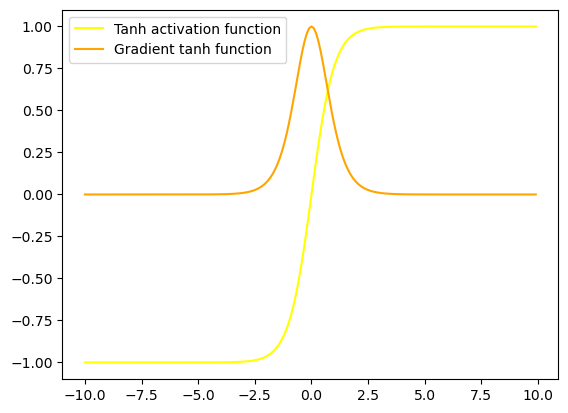

In [25]:
#e^x - e^(-x)

import matplotlib.pyplot as mpl
import numpy as np

x = np.arange(-10, 10, 0.1)
y = (np.exp(x) - np.exp(-1 * x)) / (np.exp(x) + np.exp(-1 * x))

gradient = 1 - (y ** 2) #this is the derivative of the hyperbolic tangent
mpl.plot(x, y, color='yellow', label='Tanh activation function')
mpl.plot(x, gradient, color='orange', label='Gradient tanh function')
mpl.legend()
mpl.show()

Exercise 7. 

Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.

[]

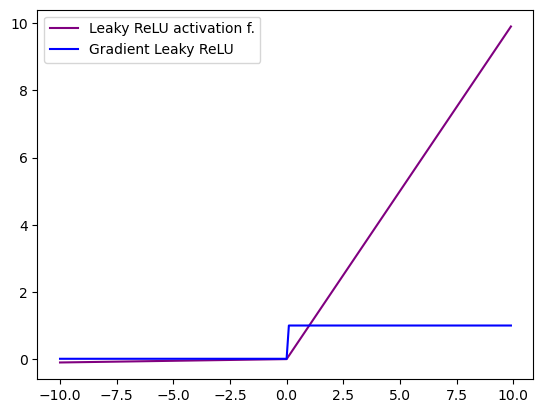

In [30]:
#𝑓(𝑥)=𝑚𝑎𝑥(0.01⋅𝑥,𝑥)
import matplotlib.pyplot as mpl
import numpy as np

x = np.arange(-10, 10, 0.1)
one_percent_x = x * (1 / 100)
y = np.maximum(one_percent_x, x)

gradient = np.where(x >= 0, 1, 0.01) #derivative for Leaky ReLU

mpl.plot(x, y, color='purple', label='Leaky ReLU activation f.')
mpl.plot(x, gradient, color='b', label='Gradient Leaky ReLU')
mpl.legend()
mpl.plot()

## Perceptron

We define a class called *Perceptron* that inherits from *torch.nn.Module*. 

In the constructor, we define a single fully-connected linear layer with $input_dim$ inputs and $output_dim$ outputs, and a $sigmoid$ activation function. In the forward method, we apply the linear transformation to the input $x$, and then apply the sigmoid activation function to the output.



In [7]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


 We create an instance of this model and use it to make predictions like this:

In [3]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)


tensor([0.6372], grad_fn=<SigmoidBackward0>)


In [4]:

import torch
import torch.nn as nn

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5204
Epoch [200/1000], Loss: 0.5043
Epoch [300/1000], Loss: 0.4953
Epoch [400/1000], Loss: 0.4900
Epoch [500/1000], Loss: 0.4868
Epoch [600/1000], Loss: 0.4848
Epoch [700/1000], Loss: 0.4836
Epoch [800/1000], Loss: 0.4828
Epoch [900/1000], Loss: 0.4823
Epoch [1000/1000], Loss: 0.4820


Exercise 8: 

Implement a binary classification model using the Perceptron class in PyTorch for the logic OR. 

Your task is to create a Perceptron instance and train it using a proper  dataset and the binary cross-entropy loss with stochastic gradient descent optimizer. 

Here are the steps you can follow:

Define a Perceptron class that inherits from torch.nn.Module and implements a binary classification model.

Define a binary cross-entropy loss function using the torch.nn.BCEWithLogitsLoss module.

Define a stochastic gradient descent optimizer using the torch.optim.SGD module.

Train the Perceptron model on the training set using the binary cross-entropy loss and stochastic gradient descent optimizer.

Evaluate the trained model compute the accuracy.


In [13]:
perceptron_OR_operation = Perceptron(input_size, output_size)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(perceptron_OR_operation.parameters(), lr=0.1) 

input_data = torch.randint(0,2,(1000, input_size)).float()
labels = torch.tensor([[1.] if (x[0] or x[1]) else [0.] for x in input_data])

num_epochs = 1_000
for epoch in range(num_epochs):
    outputs = perceptron_OR_operation(input_data)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3283
Epoch [200/1000], Loss: 0.2570
Epoch [300/1000], Loss: 0.2100
Epoch [400/1000], Loss: 0.1768
Epoch [500/1000], Loss: 0.1522
Epoch [600/1000], Loss: 0.1334
Epoch [700/1000], Loss: 0.1185
Epoch [800/1000], Loss: 0.1064
Epoch [900/1000], Loss: 0.0965
Epoch [1000/1000], Loss: 0.0881


In [22]:
test_inputs = torch.randint(0,2,(100, input_size)).float()
test_labels = torch.tensor([[1.] if (x[0] or x[1]) else [0.] for x in test_inputs])

test_outputs = perceptron_OR_operation(test_inputs)
test_accuracy = criterion(test_labels, test_outputs)
print(f"Test accuracy: {100.-test_accuracy.item():.2f}%")

Test accuracy: 91.62%
